# Dimensionality Reduction
Given the data in the matrix X we will:
* Calculate the covariance matrix $\Sigma$.
* Calculate eigenvalues and eigenvectors of $\Sigma$.
* Plot the original data $X$ and the eigenvectors to a single diagram.
* Determine the smallest eigenvalue and remove its corresponding eigenvector. The remaining eigenvector is the basis of a new subspace.
* Transform all vectors in X in this new subspace by expressing all vectors in X in this new basis.	

In [10]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

##  PCA (Principal component analysis)


### Sample data array

In [5]:
X = np.array([(-3,-2),(-2,-1),(-1,0),(0,1),
              (1,2),(2,3),(-2,-2),(-1,-1),
              (0,0),(1,1),(2,2), (-2,-3),
              (-1,-2),(0,-1),(1,0), (2,1),(3,2)])

### The covariance matrix $\Sigma$
<b>Parameters:</b><br />
<i>X</i>: array, shape [N, D] (Data matrix)<br />
<b>Returns:</b><br />
<i>Sigma</i> : array, shape [D, D] (Covariance matrix)

In [6]:
def get_covariance(X):
    
    X_T = np.transpose(X)
    Sigma = np.dot(X_T,X)
    
    return Sigma

### Eigenvalues and eigenvectors of  $\Sigma$.
Calculates the eigenvalues and eigenvectors of the input matrix.<br/>
<b>Parameters:</b><br />
<i>S</i>: array, shape [D, D] (Square symmetric positive definite matrix.)<br />
<b>Returns:</b><br />
<i>L</i> : array, shape [D] (Eigenvalues of S)<br />
<i>U</i> : array, shape [D, D] (Eigenvectors of S)

In [7]:
def get_eigen(S):
    
    L, v = np.linalg.eig(S)
    
    return L, v

### Plot: Original data X and the Eigenvectors.

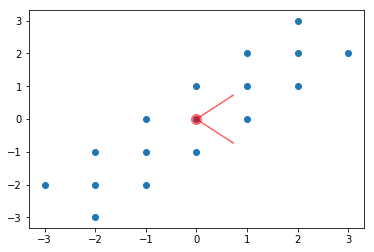

In [9]:
plt.scatter(X[:, 0], X[:, 1])# plot the original data
mean_d1, mean_d2 = X.mean(0)# plot the mean of the data
plt.plot(mean_d1, mean_d2, 'o', markersize=10, color='red', alpha=0.5)
Sigma = get_covariance(X)# calculate the covariance matrix
L, U = get_eigen(Sigma) # calculate the eigenvector and eigenvalues of Sigma

plt.arrow(mean_d1, mean_d2, U[0, 0], U[0, 1], width=0.01, color='red', alpha=0.5)
plt.arrow(mean_d1, mean_d2, U[1, 0], U[1, 1], width=0.01, color='red', alpha=0.5);

The vector pointing downwards corresponds to the smallest eigenvalue. The variance in this direction is
smaller than in the direction of the second eigenvector.

### Transforming the data

We determine the smallest eigenvalue and remove its corresponding eigenvector. The remaining eigenvector is the basis of a new subspace. We transform all vectors in X in this new subspace by expressing all vectors in X in this new basis.<br />
<b>Parameters:</b><br />
<i>X</i> : array, shape [N, D] (Data matrix.)<br />
<i>L</i> : array, shape [D] (Eigenvalues of Sigma_X)<br />
<i>U</i> : array, shape [D, D] (Eigenvectors of Sigma_X)<br />
<b>Returns:</b><br />
X_t : array, shape [N, 1] (Transformed data)





In [11]:
def transform(X, U, L):
    
    Max_eig_val = np.argmax(L)
    Min_eig_val = np.argmin(L)
    U=U[:,Max_eig_val]
    X_t=np.dot(X,U)
    Y=np.zeros(X_t.shape)
    plt.scatter(X_t,Y)
    
    return X_t

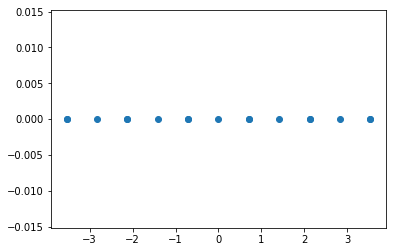

In [12]:
X_t = transform(X, U, L)

## SVD (Singular value decomposition)

### Given the matrix $M$, we find its SVD decomposition $M= U \cdot \Sigma \cdot V$ and reduce it to one dimension using SVD
<b>Parameters:</b><br />
<i>M</i> : array, shape [N, D] (Input matrix.)<br />
<b>Returns:</b><br />
<i>M_t</i> : array, shape [N, 1] (Reduced matrix)

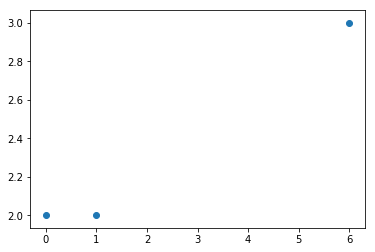

In [16]:
M = np.array([[1, 2], [6, 3],[0, 2]])
plt.scatter(M[:, 0], M[:, 1])# plot the original data

In [14]:
def reduce_to_one_dimension(M):

    U,S,V=np.linalg.svd(M,False)
    min_s_val=np.argmin(S)
    U=np.delete(U,min_s_val,axis=1)
    S=np.delete(S,min_s_val,axis=0)
    M_t=np.dot(U,S)
    Y=np.zeros(M_t.shape)
    plt.scatter(M_t,Y)
    
    return M_t

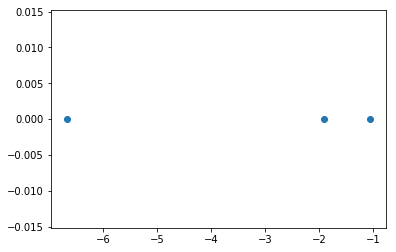

In [15]:
M_t = reduce_to_one_dimension(M)